In [166]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matplotlib.rc("font", family = "Malgun Gothic")
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_curve, auc

In [139]:
df = pd.read_csv("SCALE불량.csv", encoding = 'euc-kr')
df['SCALE']

0      양품
1      양품
2      양품
3      양품
4      양품
       ..
715    불량
716    양품
717    양품
718    양품
719    양품
Name: SCALE, Length: 720, dtype: object

In [154]:
def categorize(x):
    if x == "양품":
        return int(1)
    else:
        return int(0)
df['SCALE'] = df['SCALE'].apply(categorize)

In [156]:
df['SCALE']

0      1
1      1
2      1
3      1
4      1
      ..
715    0
716    1
717    1
718    1
719    1
Name: SCALE, Length: 720, dtype: int64

In [158]:
df_train, df_test = train_test_split(df,
                               test_size = 0.3,
                               random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (504, 21)
test data size: (216, 21)


In [159]:
log_model = Logit.from_formula("""SCALE ~ FUR_HZ_TEMP + FUR_EXTEMP + ROLLING_TEMP_T5 + ROLLING_DESCALING + PT_THK + C(HSB)""", df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.275826
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Sep 2020   Pseudo R-squ.:                  0.5586
Time:                        06:43:20   Log-Likelihood:                -139.02
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 6.012e-73
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            65.0651    4.3e+05      0.000      1.000   -8.42e+05    8.42e+05
C(HSB)[T.적용]         33.6733    4.3e+05   7.

C:\Users\cptas\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [160]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head

<bound method NDFrame.head of 146    0
131    0
650    1
613    0
355    1
      ..
470    1
675    0
452    1
40     1
149    0
Length: 216, dtype: int32>

In [162]:
print("Accuracy:{0:3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy:0.837963

Confusion Matrix:
[[ 60  11]
 [ 24 121]]


<AxesSubplot:>

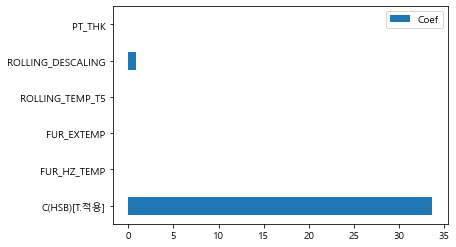

In [163]:
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [189]:
model = ["DT", "RF", "GB"]
train_accuracy = []; test_accuracy = []
model_f1_score = []
model_auc = []

<AxesSubplot:>

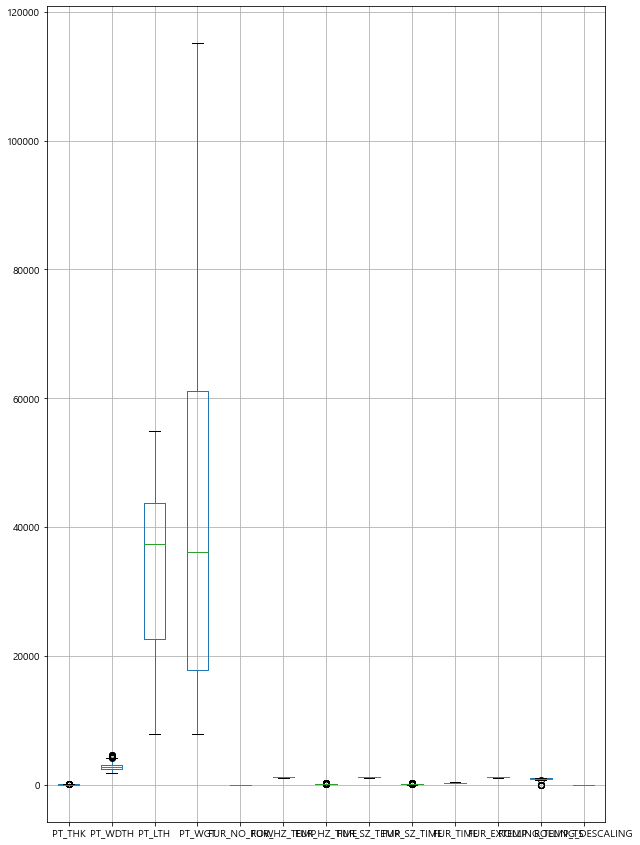

In [123]:
df.boxplot(figsize = (10,15))

In [174]:
df_base = df[["FUR_HZ_TEMP", "FUR_EXTEMP", "ROLLING_TEMP_T5", "ROLLING_DESCALING","PT_THK"]]
df_base.head()

,FUR_HZ_TEMP,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,PT_THK
0,1144,1133,934,8,32.25
1,1144,1135,937,8,32.25
2,1129,1121,889,8,33.27
3,1152,1127,885,8,33.27
4,1140,1128,873,8,38.33


In [173]:
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [125]:
v_feature_name = df_base.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_base)
df_scaled = pd.DataFrame(df_base, columns = v_feature_name)
df_scaled.head()

,FUR_HZ_TEMP,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,PT_THK
0,1144,1133,934,8,32.25
1,1144,1135,937,8,32.25
2,1129,1121,889,8,33.27
3,1152,1127,885,8,33.27
4,1140,1128,873,8,38.33


In [175]:
df_dummy = pd.concat([df["HSB"], df_scaled], axis = 1)
df_dummy = pd.get_dummies(df_dummy)
df_dummy = pd.concat([df["SCALE"], df_dummy], axis = 1) 

In [128]:
df_dummy.describe()

,FUR_HZ_TEMP,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,PT_THK,HSB_미적용,HSB_적용
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1155.338889,1149.666667,933.920833,8.319444,29.267857,0.045833,0.954167
std,20.866398,17.571788,107.863887,1.623252,19.152651,0.209269,0.209269
min,1103.000000,1113.000000,0.000000,5.000000,12.030000,0.000000,0.000000
25%,1139.000000,1132.000000,889.750000,6.000000,16.090000,0.000000,1.000000
50%,1158.000000,1155.000000,951.000000,8.000000,20.130000,0.000000,1.000000
75%,1171.000000,1164.000000,994.250000,10.000000,40.000000,0.000000,1.000000
max,1206.000000,1185.000000,1078.000000,10.000000,100.340000,1.000000,1.000000


<AxesSubplot:>

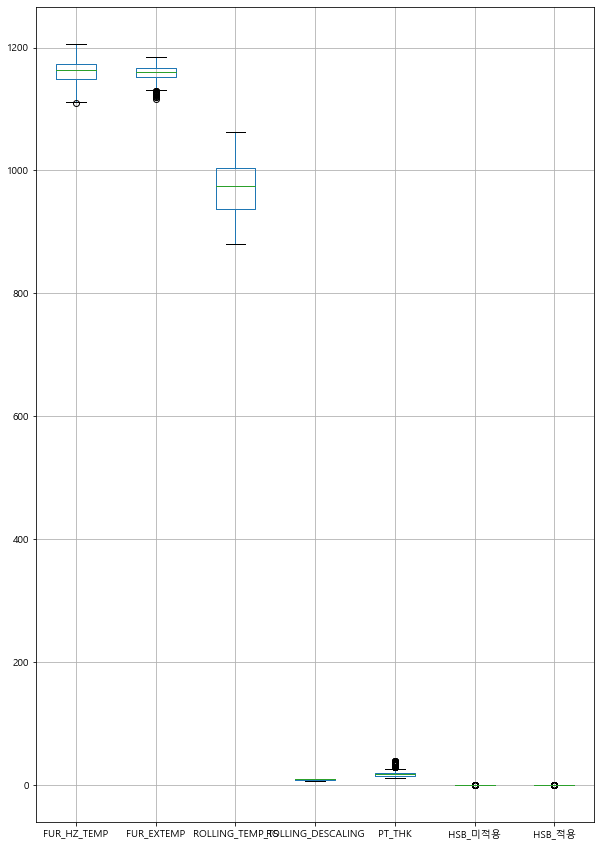

In [132]:
df_dummy.boxplot(figsize = (10,15))

In [176]:

df_dummy = df_dummy[df_dummy["PT_THK"] <= 40]
df_dummy = df_dummy[df_dummy["ROLLING_TEMP_T5"] >= 880 ]
df_dummy.head()

,SCALE,FUR_HZ_TEMP,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,PT_THK,HSB_미적용,HSB_적용
0,1,1144,1133,934,8,32.25,0,1
1,1,1144,1135,937,8,32.25,0,1
2,1,1129,1121,889,8,33.27,0,1
3,1,1152,1127,885,8,33.27,0,1
9,1,1135,1124,881,8,38.43,0,1


In [89]:
df_dummy.isnull().sum()

SCALE                0
FUR_HZ_TEMP          0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
ROLLING_DESCALING    0
PT_THK               0
HSB_미적용              0
HSB_적용               0
dtype: int64

In [134]:
df_dummy.corr().round(3)

,FUR_HZ_TEMP,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,PT_THK,HSB_미적용,HSB_적용
FUR_HZ_TEMP,1.000,0.760,-0.035,0.180,-0.211,0.039,-0.039
FUR_EXTEMP,0.760,1.000,0.191,0.145,-0.257,0.081,-0.081
ROLLING_TEMP_T5,-0.035,0.191,1.000,-0.421,0.398,-0.073,0.073
ROLLING_DESCALING,0.180,0.145,-0.421,1.000,-0.739,0.077,-0.077
PT_THK,-0.211,-0.257,0.398,-0.739,1.000,-0.055,0.055
HSB_미적용,0.039,0.081,-0.073,0.077,-0.055,1.000,-1.000
HSB_적용,-0.039,-0.081,0.073,-0.077,0.055,-1.000,1.000


In [91]:
df_train, df_test = train_test_split(df_dummy,
                               test_size = 0.3,
                               random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (353, 8)
test data size: (152, 8)


In [94]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.858,0.908
1,2,0.909,0.934
2,3,0.955,0.967
3,4,0.960,0.980
4,5,0.969,0.980
5,6,1.000,1.000
6,7,1.000,1.000
7,8,1.000,1.000
8,9,1.000,1.000
9,10,1.000,1.000


In [95]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf*2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth = 4, random_state = 1234,
                                 min_samples_leaf = v_min_samples_leaf,
                                 min_samples_split = 20)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.960,0.980
1,4,0.960,0.980
2,6,0.960,0.980
3,8,0.960,0.980
4,10,0.955,0.967
5,12,0.955,0.967
6,14,0.955,0.967
7,16,0.955,0.967
8,18,0.949,0.961
9,20,0.901,0.895


In [96]:
train_accuracy = []; test_accuracy = []
para_split = [n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.992,1.00
1,20,0.992,1.00
2,30,0.992,1.00
3,40,0.992,1.00
4,50,0.992,1.00
5,60,0.992,1.00
6,70,0.960,0.98
7,80,0.960,0.98
8,90,0.960,0.98
9,100,0.960,0.98


In [97]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.989


In [201]:
final_tree = DecisionTreeClassifier(random_state = 1234, max_depth = 6, min_samples_split = 10, min_samples_leaf = 2)
final_tree.fit(df_train_x, df_train_y)
y_pred =final_tree.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(final_tree.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(final_tree.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.992
Accuracy on test set: 1.000
Confusion matrix: 
[[60  0]
 [ 0 92]]


In [179]:
y_pred =final_tree.predict(df_test_x)
print("Accuracy: {0:.3f}".format(final_tree.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 1.000
Confusion Matrix: 
[[60  0]
 [ 0 92]]


In [190]:
train_accuracy.append(final_tree.score(df_train_x, df_train_y))
test_accuracy.append(final_tree.score(df_test_x, df_test_y))
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

In [172]:
df_test_y

146    불량
613    불량
693    양품
217    양품
226    불량
       ..
534    양품
291    양품
197    불량
426    양품
188    양품
Name: SCALE, Length: 152, dtype: object

In [116]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = final_tree.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,ROLLING_TEMP_T5,0.531
1,FUR_EXTEMP,0.157
6,HSB_적용,0.154
4,PT_THK,0.112
3,ROLLING_DESCALING,0.046
0,FUR_HZ_TEMP,0.000
5,HSB_미적용,0.000


Text(0, 0.5, '설명변수')

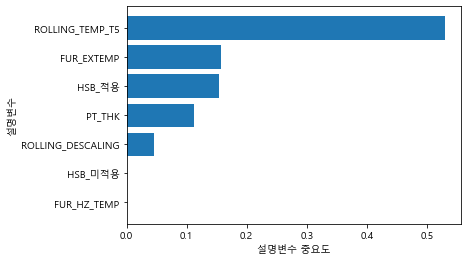

In [118]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [98]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.993
1,20,1.0,1.000
2,30,1.0,1.000
3,40,1.0,1.000
4,50,1.0,1.000
5,60,1.0,1.000
6,70,1.0,1.000
7,80,1.0,1.000
8,90,1.0,1.000
9,100,1.0,1.000


In [100]:
estimator = RandomForestClassifier(n_estimators = 20, random_state =1234)
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=20, random_state=1234)

best parameter: 
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.963


In [181]:
rf_final = RandomForestClassifier(random_state = 1234, n_estimators = 20, max_depth = 7, min_samples_leaf = 2, min_samples_split = 10)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.994
Accuracy on test set: 0.993
Confusion matrix: 
[[59  1]
 [ 0 92]]


In [191]:
train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

In [111]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,ROLLING_TEMP_T5,0.477
1,FUR_EXTEMP,0.136
3,ROLLING_DESCALING,0.111
6,HSB_적용,0.075
4,PT_THK,0.075
0,FUR_HZ_TEMP,0.069
5,HSB_미적용,0.058


Text(0, 0.5, '설명변수')

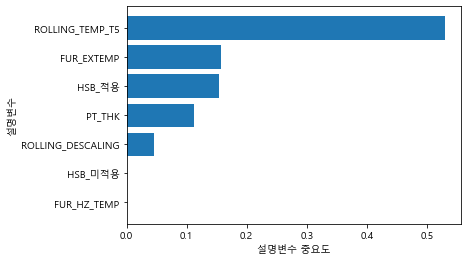

In [119]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [99]:
train_accuracy = []; test_accuracy = []
para_lr = [lr*0.1 for lr in range(1, 11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy
0,0.1,1.0,1.0
1,0.2,1.0,1.0
2,0.3,1.0,1.0
3,0.4,1.0,1.0
4,0.5,1.0,1.0
5,0.6,1.0,1.0
6,0.7,1.0,1.0
7,0.8,1.0,1.0
8,0.9,1.0,1.0
9,1.0,1.0,1.0


In [101]:
estimator = GradientBoostingClassifier(n_estimators = 20, random_state =1234)
param_grid = {"learning_rate": para_lr, "max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.9, max_depth=6, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=20,
                           random_state=1234)

best parameter: 
{'learning_rate': 0.9, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score: 
1.0


In [183]:
gb_final = GradientBoostingClassifier(random_state = 1234, n_estimators = 20, max_depth = 6, min_samples_leaf = 4, min_samples_split = 10, learning_rate = 0.9)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Confusion matrix: 
[[60  0]
 [ 0 92]]


In [192]:
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

In [197]:
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC
DT,0.992,1.000,1.0
RF,0.994,0.993,1.0
GB,1.000,1.000,1.0


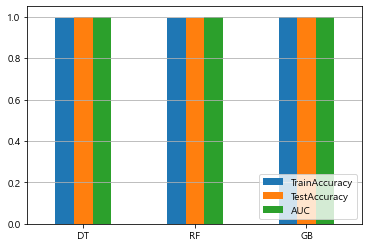

In [199]:
df_eval.plot.bar(rot = 0)
plt.legend(loc = "lower right")
plt.grid(axis = "y")

In [ ]:
train_accuracy.append(final_tree.score(df_train_x, df_train_y))
test_accuracy.append(final_tree.score(df_test_x, df_test_y))
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

In [194]:
train_accuracy

[0.9915014164305949, 0.9943342776203966, 1.0]

In [195]:
test_accuracy

[1.0, 0.993421052631579, 1.0]

In [196]:
model_auc

[1.0, 1.0, 1.0]

In [113]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,ROLLING_TEMP_T5,0.518
1,FUR_EXTEMP,0.154
6,HSB_적용,0.140
4,PT_THK,0.119
3,ROLLING_DESCALING,0.059
5,HSB_미적용,0.010
0,FUR_HZ_TEMP,0.000


Text(0, 0.5, '설명변수')

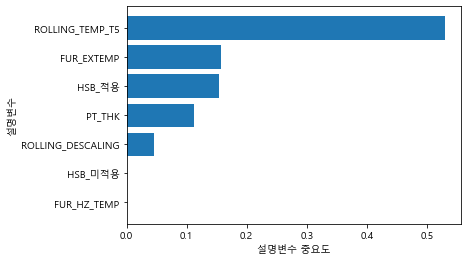

In [120]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [177]:
df_y = df_dummy["SCALE"]
df_x = df_dummy.drop("SCALE", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (353, 7)
train data y size: (353,)
test data x size: (152, 7)
test data y size: (152,)


NameError: name 'para_depth' is not defined

In [35]:
df_cat = df[["SPEC", "STEEL_KIND", "FUR_NO", "HSB", "WORK_GR"]]
df_num = df[["PT_THK", "PT_WDTH", "PT_LTH", "PT_WGT", "FUR_HZ_TEMP", "FUR_SZ_TEMP", "FUR_SZ_TIME", "ROLLING_TEMP_T5", "ROLLING_DESCALING"]]

In [36]:
df_dummy = pd.get_dummies(df_cat)
df_dummy.head()

,SPEC_A131-DH36TM,SPEC_A283-C,SPEC_A516-60,SPEC_A709-36,SPEC_AB/A,SPEC_AB/AH32,SPEC_AB/B,SPEC_AB/EH32-TM,SPEC_AB/EH36-TM,SPEC_API-2W-50T,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0


In [16]:
scaler = StandardScaler()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [37]:
v_feature_name = df_num.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TEMP,FUR_SZ_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.949149,-0.544097,0.000734,-0.19693
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.835252,-0.708951,0.028567,-0.19693
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,-1.632537,-0.654000,-0.416748,-0.19693
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,-1.290843,-0.296815,-0.453858,-0.19693
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,-1.233894,-0.846330,-0.565186,-0.19693


In [45]:
df = pd.concat([df["SCALE"], df_dummy, df_scaled], axis = 1)
df.head()

,SCALE,SPEC_A131-DH36TM,SPEC_A283-C,SPEC_A516-60,SPEC_A709-36,SPEC_AB/A,SPEC_AB/AH32,SPEC_AB/B,SPEC_AB/EH32-TM,SPEC_AB/EH36-TM,...,WORK_GR_4조,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_SZ_TEMP,FUR_SZ_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
0,양품,0,0,0,0,0,0,0,1,0,...,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.949149,-0.544097,0.000734,-0.19693
1,양품,0,0,0,0,0,0,0,1,0,...,0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,-0.835252,-0.708951,0.028567,-0.19693
2,양품,0,0,0,0,0,0,0,0,0,...,0,0.209106,1.568896,-1.095771,-0.944112,-1.263141,-1.632537,-0.654000,-0.416748,-0.19693
3,양품,0,0,0,0,0,0,0,0,0,...,0,0.209106,1.568896,-1.095771,-0.944112,-0.160124,-1.290843,-0.296815,-0.453858,-0.19693
4,양품,0,0,0,0,0,0,0,0,0,...,0,0.473482,0.562094,-1.518889,-1.174562,-0.735611,-1.233894,-0.846330,-0.565186,-0.19693


C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


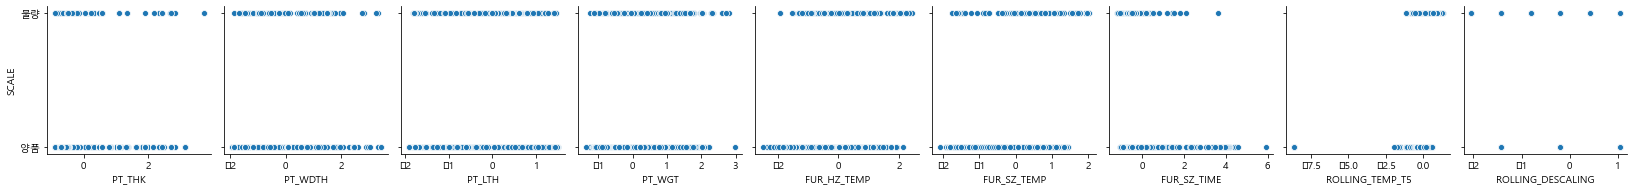

In [49]:
#그래프 분석
sns.pairplot(df, y_vars = "SCALE", x_vars = ["PT_THK", "PT_WDTH", "PT_LTH", "PT_WGT", "FUR_HZ_TEMP", "FUR_SZ_TEMP", "FUR_SZ_TIME", "ROLLING_TEMP_T5", "ROLLING_DESCALING"])

In [46]:
df_y = df["SCALE"]
df_x = df.drop("SCALE", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (504, 93)
train data y size: (504,)
test data x size: (216, 93)
test data y size: (216,)
